In [2]:
import pandas as pd
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import manifold,datasets

df = pd.read_csv('trb_vdj_kmer_mhc.csv')
# df = df[df['species'] == 0]
df_vdj = df[['v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3']].fillna(0)
df_mhc = df[['mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label']]

vdj_lists = df_vdj.values.tolist()
mhc_lists = df_mhc.values.tolist()


In [4]:
# df['antigen.epitope'].nunique()

1106

In [14]:
import ast
cdr3_kmer = df['crd3_encode'].apply(lambda x: ast.literal_eval(x))

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001A05ADEA400>>
Traceback (most recent call last):
  File "C:\Users\XxxxHuai\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
KeyboardInterrupt: 


In [15]:
# tcr_list = []
# for cdr3, vdj, mhc in zip(cdr3_kmer, vdj_lists, mhc_lists):
#     tcr_list.append(cdr3 + vdj + mhc)
# tcr_list[0]

[-0.08052249252796173,
 -1.3491982221603394,
 2.165417194366455,
 1.1816405057907104,
 -1.3901536464691162,
 1.7495988607406616,
 2.1319217681884766,
 2.785444974899292,
 -3.1611857414245605,
 -1.5323046445846558,
 -1.4833745956420898,
 -3.6346628665924072,
 -4.7299418449401855,
 -2.8853373527526855,
 5.2482733726501465,
 0.3202740550041199,
 3.919013738632202,
 5.981078624725342,
 -3.198639154434204,
 2.876141309738159,
 -0.11432736366987228,
 -0.6709185838699341,
 0.9042136669158936,
 0.20645073056221008,
 0.6248069405555725,
 -0.15699432790279388,
 0.11150328069925308,
 0.3357294797897339,
 -0.4060443639755249,
 0.025010017678141594,
 -0.4973335862159729,
 -0.3900582194328308,
 -0.1421525776386261,
 0.6573606729507446,
 0.7767179608345032,
 -0.7962958216667175,
 0.966796338558197,
 -0.12999814748764038,
 0.2060568779706955,
 -0.495603084564209,
 -0.3799554109573364,
 0.03388696536421776,
 -0.2524871230125427,
 0.2899162471294403,
 0.5645607113838196,
 0.05699770152568817,
 0.1645280

In [3]:
antigen_label = df['antigen_label'].tolist()
# type(antigen_label)

list

In [42]:
# type(tcr_list[0])

list

In [9]:
cdr3_kmer = list(cdr3_kmer)

In [22]:
##########PCA#############

pca = PCA(n_components = 100)
pca_data = pca.fit_transform(list(cdr3_kmer))

# tsne = manifold.TSNE(n_components=50, init='pca', learning_rate=100)
# reduced1_data = tsne.fit_transform(list(cdr3_kmer))

# plt.figure(figsize=(30,20))
# plt.scatter(reduced1_data[:, 0], reduced1_data[:, 1], c = antigen_label, cmap='Spectral',
#             marker='.', s = 20, alpha = 1/4)

In [23]:
tcr_list = []
for cdr3, vdj, mhc in zip(pca_data, vdj_lists, mhc_lists):
    tcr_list.append(cdr3 + vdj + mhc)

In [24]:
############TSNE##########

tsne = manifold.TSNE(n_components=2, init='pca', learning_rate=100)
reduced_data = tsne.fit_transform(tcr_list)

In [1]:
# plt.figure(figsize = (30, 20))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = antigen_label, cmap='Spectral',
            marker='.', s = 20, alpha = 1/4)

NameError: name 'plt' is not defined

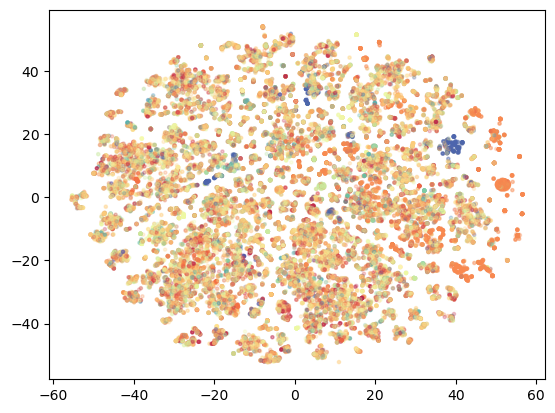

In [44]:
# plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = antigen_label, cmap='Spectral',
#             marker='.', s = 20, alpha = 1/4)